### MobileNet Implementation

In [109]:
import tensorflow as tf
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.core import Dense,Activation,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.applications.mobilenet import MobileNet
from keras.models import Model,Sequential, load_model
from keras.optimizers import RMSprop, Adam,SGD
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

In [110]:
img_row=64
img_col=64

In [111]:
MobileNet=MobileNet(weights='imagenet',include_top=False,input_shape=(img_row,img_col,3)) #Naam thikmoto dite hobe

In [112]:
for layer in MobileNet.layers:
    layer.trainable=False


In [113]:
def AddModelTop(bottom_model, num_classes):
    top_model=bottom_model.output
    top_model=Flatten()(top_model)
    top_model=Dense(256, activation='relu')(top_model)
    top_model=Dense(24, activation='relu')(top_model)
    top_model=Dense(num_classes, activation='sigmoid')(top_model)
    return top_model
num_classes=1
FC=AddModelTop(MobileNet,num_classes)

In [114]:
model=Model(inputs=MobileNet.input,outputs=FC)

In [115]:
### how to use dataset to make labels and images
import os
from pathlib import Path
from keras.preprocessing import image
path=Path('training_set_2') #give training set path

dirs=path.glob('*') #mane directoryr shob folder
image_data=[]
labels=[]

labels_dict={
    "dogs":0,
    "cats":1
}

for dir in dirs:
    label=str(dir).split('\\')[-1] #mane directoryr folder gula ke string banai pore split kore cat ar dog alada label banai
    count=0
    print (dir)
    #iterate over all folder_dir and pick all the images
    for img_path in dir.glob("*.jpg"):
        img=image.load_img(img_path, target_size=(64,64))
        img_array=image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])
        count+=1
    print(count)


#train_data_dir='training_set\\training_set'
test_data_dir='test_set_2'

training_set_2\cats
11500
training_set_2\dogs
11500


In [127]:
test_data_dir='test_set\\test_set'

In [128]:
train_datagen = ImageDataGenerator(           #Using data Augmentation
                    rescale=1.0/255,
                    rotation_range=30,
                    width_shift_range=0.3,
                    height_shift_range=0.3,
                    horizontal_flip=True,
                    fill_mode='nearest',
                    )

test_datagen = ImageDataGenerator(rescale=1.0/255)

batch_size=64
train_generator=train_datagen.flow_from_directory(
                path,
                target_size=(img_row,img_col),
                batch_size=batch_size,
                class_mode='binary',
                shuffle=True)
test_generator=test_datagen.flow_from_directory(
                test_data_dir,
                target_size=(img_row,img_col),
                batch_size=batch_size,
                class_mode='binary'
        )

Found 23000 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [129]:
model.compile(loss='binary_crossentropy',
             optimizer=Adam(lr=.001),
             metrics=['accuracy'])

In [130]:
reduce_LR=ReduceLROnPlateau(monitor='val_loss', #helps to monitor if val_loss;if it doesn't reduce after 5 epochs, the learning rate will be decreased and checked again in the same way;this will be done upto lr=.001
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.0001)

training_samples=8005
testing_samples=2023
batch_size=64
epochs=10

In [131]:
history=model.fit_generator(
                train_generator,
                steps_per_epoch=training_samples/batch_size,
                epochs=epochs,
                callbacks=[reduce_LR],
                validation_data=test_generator,
                validation_steps=testing_samples/batch_size,
                shuffle=True)

Epoch 1/10
126/125 [==============================] - 156s 1s/step - loss: 0.5642 - accuracy: 0.7152 - val_loss: 0.3947 - val_accuracy: 0.7879
Epoch 2/10
126/125 [==============================] - 157s 1s/step - loss: 0.5077 - accuracy: 0.7471 - val_loss: 0.4238 - val_accuracy: 0.7879
Epoch 3/10
126/125 [==============================] - 159s 1s/step - loss: 0.5041 - accuracy: 0.7462 - val_loss: 0.3045 - val_accuracy: 0.8206
Epoch 4/10
126/125 [==============================] - 57s 450ms/step - loss: 0.5009 - accuracy: 0.7512 - val_loss: 0.3079 - val_accuracy: 0.8235
Epoch 5/10
126/125 [==============================] - 57s 452ms/step - loss: 0.4876 - accuracy: 0.7582 - val_loss: 0.3308 - val_accuracy: 0.8082
Epoch 6/10
126/125 [==============================] - 60s 477ms/step - loss: 0.4777 - accuracy: 0.7657 - val_loss: 0.3892 - val_accuracy: 0.8324
Epoch 7/10
126/125 [==============================] - 60s 476ms/step - loss: 0.4742 - accuracy: 0.7661 - val_loss: 0.2046 - val_accuracy

In [132]:
model.save('cats_dogs_newdataset_10epochs')

In [50]:
#saving the history file as a pickle

import pickle 

pickle_out = open("cats_dogs_mobilenet_10epochs.pickle","wb")
pickle.dump(history.history, pickle_out)
pickle_out.close()

In [51]:
#loading out the saved pickle folder

pickle_in = open("cats_dogs_mobilenet_10epochs.pickle","rb")
saved_history = pickle.load(pickle_in)
print(saved_history)

{'val_loss': [0.06721208989620209, 0.06244359165430069, 0.015099244192242622, 0.008679737336933613, 0.02566646598279476, 0.001053245854564011, 0.024893293157219887, 0.04351194575428963, 3.225459575653076, 4.738265514373779], 'val_accuracy': [0.9372219443321228, 0.9629263281822205, 0.9461196064949036, 0.9589717984199524, 0.9634206891059875, 0.9728126525878906, 0.971824049949646, 0.9678695201873779, 0.969846785068512, 0.9673751592636108], 'loss': [0.844911413975316, 0.2522087303382914, 0.2254957238262255, 0.20010368761436073, 0.19507901098004435, 0.18232359445742857, 0.18485037799107887, 0.1759276869444457, 0.1645363915793081, 0.16682413505305357], 'accuracy': [0.83747655, 0.8990631, 0.9060587, 0.91830105, 0.91992503, 0.92692065, 0.9277951, 0.93129295, 0.93529046, 0.9330419], 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]}


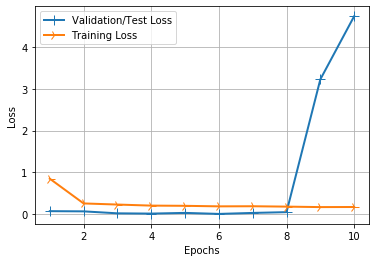

In [52]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

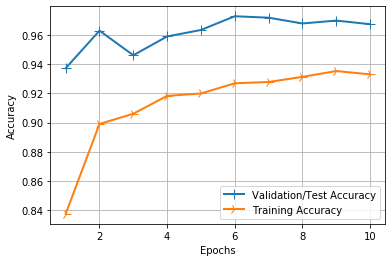

In [54]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [70]:
model_2=load_model('cats_vs_dogs_V1.h5')

In [134]:
from sklearn.metrics import classification_report,confusion_matrix

Y_pred = model.predict_generator(test_generator, testing_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
#target_names = list(class_labels.values())                                 #['class 0','class 1']
print(classification_report(test_generator.classes, y_pred, target_names=None))

Confusion Matrix
[[1011    0]
 [1012    0]]
Classification Report
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1011
           1       0.00      0.00      0.00      1012

    accuracy                           0.50      2023
   macro avg       0.25      0.50      0.33      2023
weighted avg       0.25      0.50      0.33      2023

